<a href="https://colab.research.google.com/github/sagihaider/EEG_Deep/blob/master/main_Single_Trial_Classification_PatientData_Binary_NSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sagihaider/EEG_Deep.git

Cloning into 'EEG_Deep'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 254 (delta 2), reused 0 (delta 0), pack-reused 247
Receiving objects: 100% (254/254), 1.07 GiB | 38.96 MiB/s, done.
Resolving deltas: 100% (106/106), done.
Checking out files: 100% (72/72), done.


In [2]:
import scipy.io as spio
import numpy as np
from importlib.machinery import SourceFileLoader

# EEGNet-specific imports
from EEG_Deep.EEGModels import EEGNet, ShallowConvNet, DeepConvNet, EEGNet_Patient
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# tools for plotting confusion matrices
from matplotlib import pyplot as plt
from scipy.signal import butter, lfilter

!pip install neural_structured_learning
import tensorflow as tf
import neural_structured_learning as nsl

     |████████████████████████████████| 112kB 9.7MB/s 


In [0]:
# Band-pass Filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y


In [0]:
class HParams(object):
  """Hyperparameters used for training."""
  def __init__(self):
    ### eval parameters
    self.eval_steps = 1  # All instances in the test set are evaluated.

HPARAMS = HParams()

EEG_Deep/Data2A/Data_A01T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A01E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 0s 62ms/step - loss: 1.4253 - categorical_crossentropy: 1.4253 - categorical_accuracy: 0.2208 - val_loss: 1.3848 - val_categorical_crossentropy: 1.3848 - val_categorical_accuracy: 0.2340
Epoch 2/300
8/8 [==============================] - 0s 19ms/step - loss: 1.3794 - categorical_crossentropy: 1.3794 - categorical_accuracy: 0.2833 - val_loss: 1.3832 - val_categorical_crossentropy: 1.3832 - val_categorical_accuracy: 0.2340
Epoch 3/300
8/8 [==============================] - 0s 18ms/step - loss: 1.3621 - categorical_crossentropy: 1.3621 - categorical_accuracy: 0.3333 - val_loss: 1.3808 - val_categorical_crossen

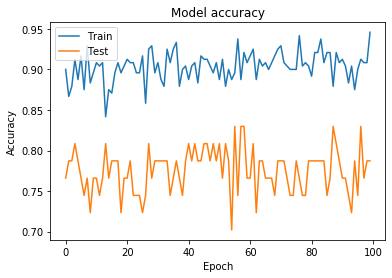


# Evaluate on test data
9/9 [==============================] - 0s 13ms/step - loss: 0.5492 - categorical_crossentropy: 0.5492 - categorical_accuracy: 0.7604
test loss, test acc: [0.5491737458440993, 0.5491738, 0.7604167]
EEG_Deep/Data2A/Data_A02T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A02E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 0s 59ms/step - loss: 1.4090 - categorical_crossentropy: 1.4090 - categorical_accuracy: 0.2583 - val_loss: 1.3840 - val_categorical_crossentropy: 1.3840 - val_categorical_accuracy: 0.2553
Epoch 2/300
8/8 [==============================] - 0s 17ms/step - loss: 1.3764 - categorical_crossentropy: 1.3764 - categorical_accuracy: 0.3083 - val_loss: 1.3834 - val_categorical_crossentropy: 1.3834 - 

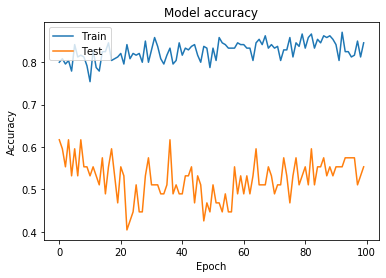


# Evaluate on test data
9/9 [==============================] - 0s 12ms/step - loss: 1.0397 - categorical_crossentropy: 1.0397 - categorical_accuracy: 0.5833
test loss, test acc: [1.0396781431304083, 1.0396781, 0.5833333]
EEG_Deep/Data2A/Data_A03T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A03E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 0s 58ms/step - loss: 1.4256 - categorical_crossentropy: 1.4256 - categorical_accuracy: 0.1917 - val_loss: 1.3877 - val_categorical_crossentropy: 1.3877 - val_categorical_accuracy: 0.2128
Epoch 2/300
8/8 [==============================] - 0s 17ms/step - loss: 1.3762 - categorical_crossentropy: 1.3762 - categorical_accuracy: 0.2917 - val_loss: 1.3867 - val_categorical_crossentropy: 1.3867 - 

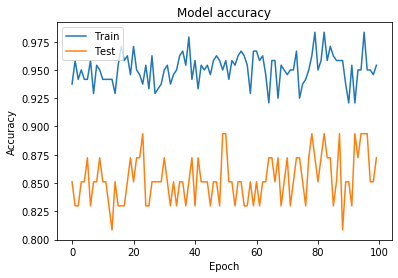


# Evaluate on test data
9/9 [==============================] - 0s 13ms/step - loss: 0.3395 - categorical_crossentropy: 0.3395 - categorical_accuracy: 0.8646
test loss, test acc: [0.3394852230946223, 0.33948523, 0.8645833]
EEG_Deep/Data2A/Data_A04T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A04E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 0s 57ms/step - loss: 1.4212 - categorical_crossentropy: 1.4212 - categorical_accuracy: 0.2375 - val_loss: 1.3853 - val_categorical_crossentropy: 1.3853 - val_categorical_accuracy: 0.1915
Epoch 2/300
8/8 [==============================] - 0s 17ms/step - loss: 1.3788 - categorical_crossentropy: 1.3788 - categorical_accuracy: 0.2542 - val_loss: 1.3841 - val_categorical_crossentropy: 1.3841 -

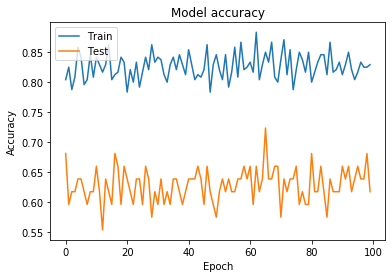


# Evaluate on test data
9/9 [==============================] - 0s 12ms/step - loss: 0.9258 - categorical_crossentropy: 0.9258 - categorical_accuracy: 0.6076
test loss, test acc: [0.9257945815722147, 0.9257946, 0.6076389]
EEG_Deep/Data2A/Data_A05T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A05E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 0s 58ms/step - loss: 1.4075 - categorical_crossentropy: 1.4075 - categorical_accuracy: 0.2625 - val_loss: 1.3881 - val_categorical_crossentropy: 1.3881 - val_categorical_accuracy: 0.2766
Epoch 2/300
8/8 [==============================] - 0s 18ms/step - loss: 1.3780 - categorical_crossentropy: 1.3780 - categorical_accuracy: 0.3042 - val_loss: 1.3837 - val_categorical_crossentropy: 1.3837 - 

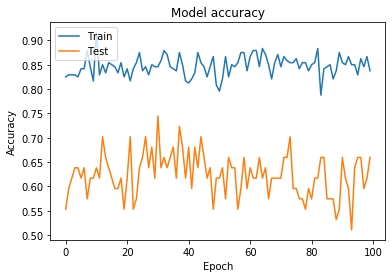


# Evaluate on test data
9/9 [==============================] - 0s 13ms/step - loss: 1.4264 - categorical_crossentropy: 1.4264 - categorical_accuracy: 0.4653
test loss, test acc: [1.4263625542322795, 1.4263626, 0.4652778]
EEG_Deep/Data2A/Data_A06T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A06E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 1s 86ms/step - loss: 1.4063 - categorical_crossentropy: 1.4063 - categorical_accuracy: 0.2958 - val_loss: 1.3866 - val_categorical_crossentropy: 1.3866 - val_categorical_accuracy: 0.2979
Epoch 2/300
8/8 [==============================] - 0s 19ms/step - loss: 1.3738 - categorical_crossentropy: 1.3738 - categorical_accuracy: 0.3125 - val_loss: 1.3860 - val_categorical_crossentropy: 1.3860 - 

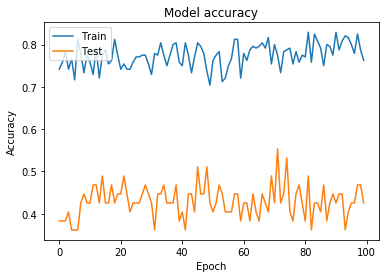


# Evaluate on test data
9/9 [==============================] - 0s 13ms/step - loss: 1.2155 - categorical_crossentropy: 1.2155 - categorical_accuracy: 0.4896
test loss, test acc: [1.215488659010993, 1.2154887, 0.48958334]
EEG_Deep/Data2A/Data_A07T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A07E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 0s 59ms/step - loss: 1.4019 - categorical_crossentropy: 1.4019 - categorical_accuracy: 0.2667 - val_loss: 1.3843 - val_categorical_crossentropy: 1.3843 - val_categorical_accuracy: 0.3191
Epoch 2/300
8/8 [==============================] - 0s 16ms/step - loss: 1.3738 - categorical_crossentropy: 1.3738 - categorical_accuracy: 0.3208 - val_loss: 1.3841 - val_categorical_crossentropy: 1.3841 - 

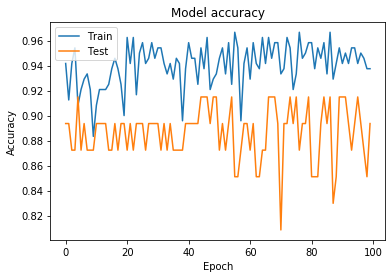


# Evaluate on test data
9/9 [==============================] - 0s 13ms/step - loss: 0.5531 - categorical_crossentropy: 0.5531 - categorical_accuracy: 0.8090
test loss, test acc: [0.5530960592958662, 0.55309606, 0.8090278]
EEG_Deep/Data2A/Data_A08T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A08E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 0s 59ms/step - loss: 1.4113 - categorical_crossentropy: 1.4113 - categorical_accuracy: 0.2500 - val_loss: 1.3843 - val_categorical_crossentropy: 1.3843 - val_categorical_accuracy: 0.2979
Epoch 2/300
8/8 [==============================] - 0s 18ms/step - loss: 1.3823 - categorical_crossentropy: 1.3823 - categorical_accuracy: 0.2917 - val_loss: 1.3825 - val_categorical_crossentropy: 1.3825 -

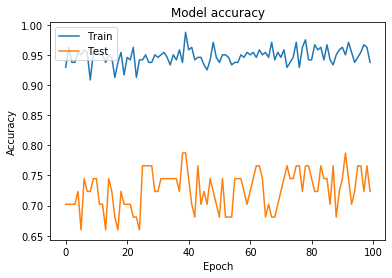


# Evaluate on test data
9/9 [==============================] - 0s 13ms/step - loss: 0.6122 - categorical_crossentropy: 0.6122 - categorical_accuracy: 0.7396
test loss, test acc: [0.6121543447176615, 0.6121543, 0.7395833]
EEG_Deep/Data2A/Data_A09T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A09E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 0s 58ms/step - loss: 1.3792 - categorical_crossentropy: 1.3792 - categorical_accuracy: 0.2750 - val_loss: 1.3856 - val_categorical_crossentropy: 1.3856 - val_categorical_accuracy: 0.2553
Epoch 2/300
8/8 [==============================] - 0s 18ms/step - loss: 1.3381 - categorical_crossentropy: 1.3381 - categorical_accuracy: 0.4000 - val_loss: 1.3795 - val_categorical_crossentropy: 1.3795 - 

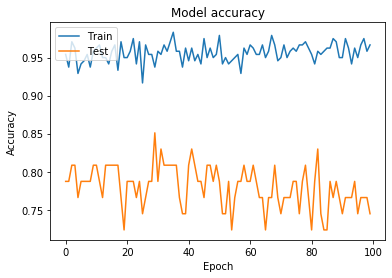


# Evaluate on test data
9/9 [==============================] - 0s 13ms/step - loss: 0.5428 - categorical_crossentropy: 0.5428 - categorical_accuracy: 0.8160
test loss, test acc: [0.5427941050794389, 0.542794, 0.8159722]
[[0.54917377 0.76041669]
 [1.0396781  0.58333331]
 [0.33948523 0.86458331]
 [0.9257946  0.6076389 ]
 [1.42636263 0.46527779]
 [1.21548867 0.48958334]
 [0.55309606 0.80902779]
 [0.6121543  0.73958331]
 [0.54279399 0.81597221]]


<Figure size 432x288 with 0 Axes>

In [9]:
from numpy import zeros
K.clear_session()
cols = 2
rows = 9
acc_all = zeros([rows, cols])
X_tr = np.empty([288, 22, 1875])
X_ts = np.empty([288, 22, 1875])


for x in range(1,10):
  fName = 'EEG_Deep/Data2A/Data_A0' + str(x) + 'T.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_tr = mat['cleanRawEEGData']
  y_tr = mat['cleanClassLabels']
  
  print(np.shape(r_X_tr))
  print(np.shape(y_tr))

  for t in range(r_X_tr.shape[0]):
    tril = r_X_tr[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_tr[t,:,:] = tril_filtered 
    
  # split data of each subject in training and validation
  X_train      = X_tr[0:240,:,500:1250]
  Y_train      = y_tr[0:240]
  X_val       = X_tr[241:,:,500:1250]
  Y_val       = y_tr[241:]

  print(np.shape(X_train))
  print(np.shape(Y_train))
  print(np.shape(X_val))
  print(np.shape(Y_val))
  
  # convert labels to one-hot encodings.
  Y_train      = np_utils.to_categorical(Y_train-1)
  Y_val       = np_utils.to_categorical(Y_val-1)

  kernels, chans, samples = 1, 22, 750
  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_train      = X_train.reshape(X_train.shape[0], kernels, chans, samples)
  X_val       = X_val.reshape(X_val.shape[0], kernels, chans, samples)
   
  print('X_train shape:', X_train.shape)
  print(X_train.shape[0], 'train samples')
  print(X_val.shape[0], 'val samples')

  # Load test data         
  fName = 'EEG_Deep/Data2A/Data_A0' + str(x) + 'E.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_ts = mat['cleanRawEEGData']
  y_ts = mat['cleanClassLabels']

  print(np.shape(r_X_ts))
  print(np.shape(y_ts))

  for t in range(r_X_ts.shape[0]):
    tril = r_X_ts[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_ts[t,:,:] = tril_filtered 

  X_test      = X_ts[:,:,500:1250]
  Y_test      = y_ts[:]
  print(np.shape(X_test))
  print(np.shape(Y_test))

  #convert labels to one-hot encodings.
  Y_test      = np_utils.to_categorical(Y_test-1)

  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_test      = X_test.reshape(X_test.shape[0], kernels, chans, samples)

  print('X_train shape:', X_test.shape)
  print(X_test.shape[0], 'train samples')

  # configure the EEGNet-8,2,16 model with kernel length of 32 samples (other 
  # model configurations may do better, but this is a good starting point)
  model = EEGNet(nb_classes = 4, Chans = 22, Samples = 750, 
                 dropoutRate = 0.25, kernLength = 25, F1 = 8, 
                 D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout')

  adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.5, adv_grad_norm='infinity')
  adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)
  
  # compile the model and set the optimizers
  adv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
  batch_size = 32

  X_train = tf.cast(X_train, tf.float32)
  X_test = tf.cast(X_test, tf.float32)
  X_val = tf.cast(X_val, tf.float32)


  train_data = tf.data.Dataset.from_tensor_slices({'input': X_train, 'label': Y_train}).batch(batch_size)
  val_data = tf.data.Dataset.from_tensor_slices({'input': X_val, 'label': Y_val}).batch(batch_size)
  test_data = tf.data.Dataset.from_tensor_slices({'input': X_test, 'label': Y_test}).batch(batch_size)

  val_steps = X_val.shape[0] // batch_size

  
  adv_model.fit(train_data, validation_data=val_data, validation_steps=None, epochs=300, verbose=1)

  history = adv_model.fit(train_data, validation_data=val_data, validation_steps=None, epochs=100, verbose=1)

  # Plot training & validation accuracy values
  plt.plot(history.history['categorical_accuracy'])
  plt.plot(history.history['val_categorical_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  figName = 'Accuracy_A0' + str(x) + '.png'  
  plt.savefig(figName)

  print('\n# Evaluate on test data')
  results = adv_model.evaluate(test_data)
  print('test loss, test acc:', results)

  acc_all[x - 1, 0] = results[1]
  acc_all[x - 1, 1] = results[2]

  from keras import backend as K 
  # Do some code, e.g. train and save model
  K.clear_session()


print(acc_all)


In [0]:
import pandas as pd
df_accl_all = pd.DataFrame({'Class1vs2': 100*acc_all[:, 1]})
df_accl_all.to_csv (r'EEG_Deep/df_accl_allPatient_8_24_2560:4096.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
